# Sentiment Analysis of Theme Park Reviews
Author: Caleb Hathaway


Importing all libraries needed for program

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import spacy
from nltk.corpus import stopwords
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from ipywidgets import HBox, Label, Layout
import ipywidgets as widgets
from statistics import mean


Initiating the Sentiment Analysis Model

In [329]:
sia = SentimentIntensityAnalyzer()


Picking a park to see reviews for

In [312]:
parkOption = widgets.Select(
    options = ['Disney', 'Universal'],
    value = 'Disney',
    # rows = 10,
    description = 'Park:',
    disabled = False
)
parkOption

Select(description='Park:', options=('Disney', 'Universal'), value='Disney')


Assigning the park dataset to whichever park is picked

In [316]:
if(parkOption.value == 'Disney'):
    parkData = pd.read_csv('DisneylandReviews.csv')
elif(parkOption.value == 'Universal'):
    parkData = pd.read_csv('UniversalReviews.csv')
parkData

,ID,Date,Review
0,121,2016-1,We went to Universal over Memorial Day weekend...
1,122,2016-1,The food service is horrible. I’m not reviewin...
2,123,2016-1,I booked this vacation mainly to ride Hagrid m...
3,124,2016-1,When a person tries the test seat for the ride...
4,125,2016-1,"Ok, I can't stress enough to anyone and everyo..."
...,...,...,...
979,1100,2019-12,My wife and myself visited here with family an...
980,1101,2019-12,We went to the park today to use our passes fo...
981,1102,2019-12,Escape from Gringotts is amazing! Just dont br...
982,1103,2019-12,This was my first visit to Universal Studios. ...



Asigning terms for cleaning dataset

In [ ]:
nlp = spacy.load('en_core_web_sm',disable = ['parser','ner'])
stop = stopwords.words('english')


All methods that will be used to visualize the data and clean the data

In [276]:
def barChart_generator(data, title = None):
    fig = plt.figure()
    ax = fig.add_axes([0,1,2,3])
    x = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    sentimentsTitle = ['Positive', 'Negative']
    pos = data['positive']
    neg = data['negative']
    sentimentValues = [pos, neg]
    ax.bar(sentimentsTitle, sentimentValues)
    plt.yticks(np.arange(min(x), max(x), 5.0))
    plt.title(title)
    plt.show()

In [277]:
def pieChart_generator(scores, title = None):
    labels = ['positive', 'negative', 'neutral']
    sizes = [scores[0], scores[1], scores[2]]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(title)
    plt.show()

In [278]:
def wordCloud_generator(data, title = None):
    data_cleaned = cleaning(data)
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data_cleaned.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()

In [279]:
def clean_string(text, stem = "None"):
    final_string = ""
    # Make lower
    text = text.lower()
    # Remove line breaks
    text = re.sub(r'\n', '', text)
    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im', 'go', 'we', 'unless', 'back', 'lot']
    text_filtered = [word for word in text if not word in useless_words]
    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered
    final_string = ' '.join(text_stemmed)
    return final_string

In [280]:
def cleaning(reviews):
    nlp = spacy.load('en_core_web_sm',disable = ['parser','ner'])
    stop = stopwords.words('english')
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word 
                              in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [word for word in words if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    data_cleaned = pd.DataFrame()
    data_cleaned['clean_reviews'] = all_
    return data_cleaned['clean_reviews']


Pick a year for the subset of data to be parsed

In [281]:
yearOption = widgets.Select(
    options = ['2016', '2017', '2018', '2019'],
    value = '2016',
    # rows = 10,
    description = 'Year:',
    disabled = False
)
yearOption

Select(description='Year:', options=('2016', '2017', '2018', '2019'), value='2016')


Pick a year for the subset of data to be parsed

In [282]:
monthOption = widgets.Select(
    options = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
    value = '1',
    # rows = 10,
    description = 'Month:',
    disabled = False
)
monthOption

Select(description='Month:', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'), value='1…


Using the selected Year and Month to pull the subset of data that will be analyzed

In [317]:
selectedData = parkData[parkData['Date'] == yearOption.value + '-' + monthOption.value]['Review']
selectedData

0     We went to Universal over Memorial Day weekend...
1     The food service is horrible. I’m not reviewin...
2     I booked this vacation mainly to ride Hagrid m...
3     When a person tries the test seat for the ride...
4     Ok, I can't stress enough to anyone and everyo...
5     Worst experience I have ever had the rides are...
6     I just expected more. Alot of waiting around, ...
7     This was my 4th trip with my daughter to Unive...
8     Universal is one thing - Not Disney. Everythin...
9     We spent 6 nights on site at Sapphire Falls as...
10    I'm literally standing in a line for the Hagri...
11    Universal Adventure Park was the best out of t...
12    It’s no Disney, I’ll tell you that much. We ju...
13    We went to City Walk due to being with our qua...
14    For all ages rides and restaurants lots of pho...
15    The park is always awesome. It vets pretty cro...
16    It was humid, it was windy, we had to wear mas...
17    very rude workers yelled at TONS of people


Parsing data for data visualization

In [332]:
yearSelection = parkData.loc[parkData["Date"].between(yearOption.value + "-1", yearOption.value + '-12')]["Review"]


Displaying reviews to pick, the review picked can be ran through the sentiment analyzer

In [333]:
style = {'description_width': 'initial'}
reviewOption = widgets.Select(
    options = [selectedData[0], selectedData[1], selectedData[2], selectedData[3], selectedData[4], selectedData[5], selectedData[6], selectedData[7], selectedData[8], selectedData[9], selectedData[10], selectedData[11], selectedData[12], selectedData[13], selection[14], selectedData[15], selectedData[16], selectedData[17]],
    # rows = 18,
    description = 'Review:',
    disabled = False,
    layout = Layout(width = '100%', height = '100px')
)
reviewOption

Select(description='Review:', layout=Layout(height='100px', width='100%'), options=('We went to Universal over…


Cleaning the selected review using the clean_string() def before it is put through the senetiment analyzer

In [321]:
cleaned = clean_string(reviewOption.value)
if (sia.polarity_scores(cleaned)['compound'] > 0):
    print("This review's sentiment is Positive")
else:
    print("This review's sentiment is Negative")

This review's sentiment is Negative


In [322]:
positiveReview = 0
negativeReview = 0
values = dict()
cleaned = cleaning(yearSelection)
for review in cleaned:
    if (sia.polarity_scores(review)['compound'] > 0):
        positiveReview += 1
    else:
        negativeReview += 1
values['positive'] = positiveReview
values['negative'] = negativeReview


Displaying the number of positive and negative reviews that the sentiment analysis model has detected

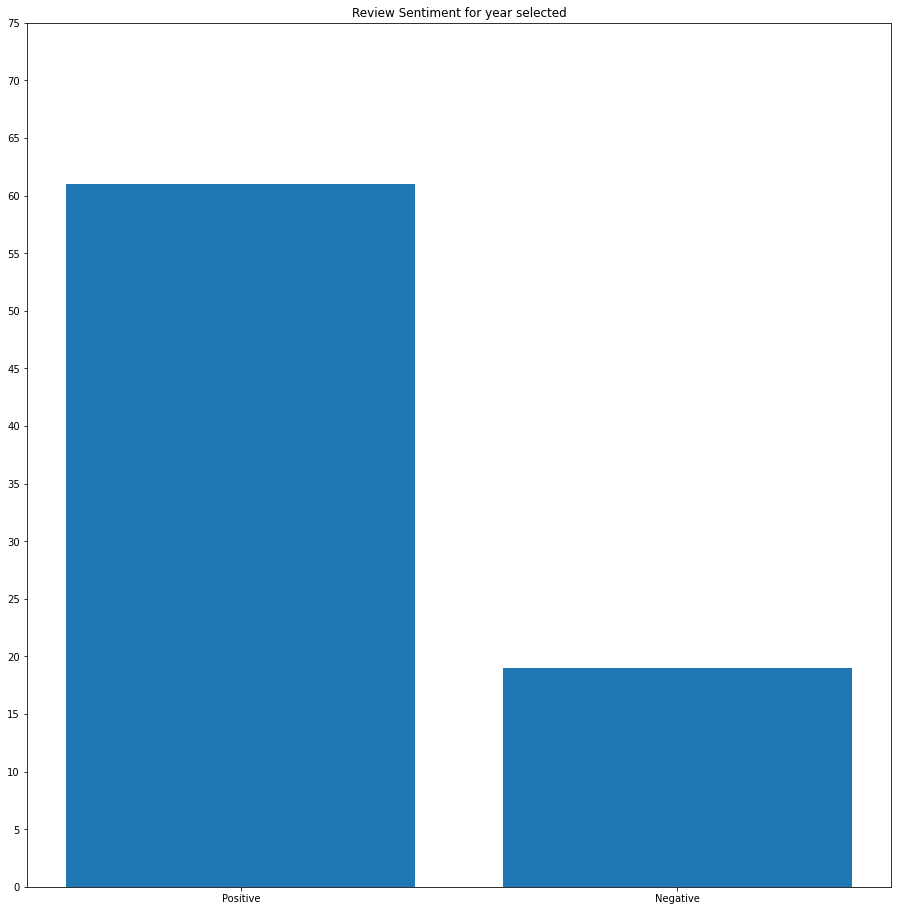

In [323]:
barChart_generator(values, "Review Sentiment for year selected")


Pulling, cleaning, running the reviews through the sentiment model then appending each value to an array

In [324]:
posavg = 0
negavg = 0
nueavg = 0
pos = []
neg = []
nue = []
scores = []
cleaned = cleaning(yearSelection)

for review in cleaned:
    sentiment = sia.polarity_scores(review)['pos']
    pos.append(sentiment)
    
for review in cleaned:    
    sentiment = sia.polarity_scores(review)['neg']
    neg.append(sentiment)
    
for review in cleaned:    
    sentiment = sia.polarity_scores(review)['neu']
    nue.append(sentiment)

    
for val in pos:
    posavg += val
    
for val in neg:
    negavg += val
    
for val in nue:
    nueavg += val

posavg = posavg / len(pos)
negavg = negavg / len(neg)
nueavg = nueavg / len(nue)

scores.append(posavg)
scores.append(negavg)
scores.append(nueavg)


Using pulled scores and displaying the average of the overall sentiment values for the year selected

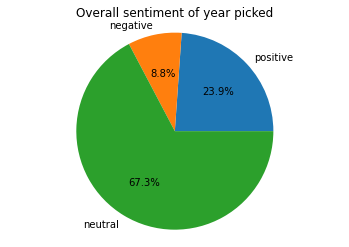

In [325]:
pieChart_generator(scores, "Overall sentiment of year picked")


Pulling all the reviews for the selected month, year, park and making a display the most used words for that time period 
and park

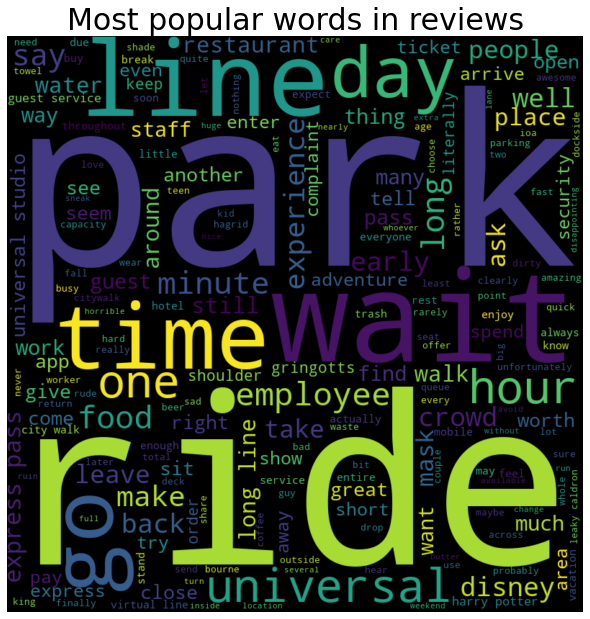

In [326]:
wordCloud_generator(selectedData, "Most popular words in reviews")